<h1 style="font-size:2.75rem;color:black;"> Design Script for a Complementary Folded Cascode Amplifier</h1>

# <u> Imports

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# <u> Units

In [11]:
q  = 1.60e-19   # Electron charge
KB = 1.38e-23   # Boltzmann constant

engFormat_Gain  = EngFormatter(unit='dB',     places=3, sep=' ')
engFormat_GBW   = EngFormatter(unit='Hz',     places=3, sep=' ')
engFormat_OS    = EngFormatter(unit='V',      places=3, sep=' ')
engFormat_PD    = EngFormatter(unit='W',      places=3, sep=' ')
engFormat_FoM   = EngFormatter(unit='s/V^-2', places=3, sep=' ')
engFormat_FP2 = EngFormatter(unit='Hz',      places=3, sep=' ')
engFormat_FP3 = EngFormatter(unit='Hz',      places=3, sep=' ')
engFormat_Width = EngFormatter(unit='m',      places=2, sep=' ')
engFormat_NF = EngFormatter(      places=2, sep=' ')

# <u> Design data

In [12]:
IB  = 100e-06   # Bias current
CL  = 5.0e-12   # Load capacitance
VDD = 1.2       # Supply voltage
BE  = 0.75

# Transistor lengths
L_9aN     = 0.6e-06;  L_9bP    = 0.6e-06;   L_2aN    = 0.6e-06;   L_2bP    = 0.6e-06;
L_11P     = 0.6e-06;  L_4P     = 0.6e-06;   L_6N     = 0.6e-06;   L_8N     = 0.6e-06;
# Bulk-source voltage drop
VBS_9aN   = 0;        VBS_9bP  = 0;         VBS_2aN  = 300e-03;   VBS_2bP  = 300e-03;
VBS_11P   = 0;        VBS_4P   = 300e-03;   VBS_6N   = 300e-03;   VBS_8N   = 0;
# Saturation voltage voltage
VDSAT_9aN = 100e-03;  VDSAT_9bP = 100e-03;  VDSAT_2aN = 100e-03;  VDSAT_2bP = 100e-03;
VDSAT_11P = 100e-03;  VDSAT_4P  = 100e-03;  VDSAT_6N  = 100e-03;  VDSAT_8N  = 100e-03;

# Array definition
L_arr    = np.arange(0.24e-06, 1.00e-06, 0.76e-06/100)
VSAT_arr = np.arange(50e-03, 175e-03, 200e-03/100)

# <u> Technology Definitions

In [13]:
# Parameters for TSMC65NM (K = u0*Cox = u0*E0*epsrox/toxm)
V_TN = 0.28615208;   K_N = 244.961e-06; # 0.0184444380*8.854e-12*3.9/2.60e-09
V_TP = 0.43718619;   K_P = 130.808e-06; # 0.0106069150*8.854e-12*3.9/2.80e-09

# Non LDD region source-gate overlap capacitance per unit channel width - CGSO/CGDO (TSMC65NM)
CGSD0_N = 89.18e-12
CGSD0_P = 74.90e-12

# Cox = E0*Er/tox (TSMC65NM)
COX_N = 13.28e-03   # 8.854e-12*3.9/2.60e-09
COX_P = 12.33e-03   # 8.854e-12*3.9/2.80e-09

# Drain/source minimum drawing area
Sd_s = 0.2*1e-06

# Bottom junction capacitance per unit area at zero bias - CJS/CJD (TSMC65NM)
CJ_N   = 1.185e-03;   CJ_P   = 1.068e-03;

# Bottom junction built-in potential - PBS/PBD (TSMC65NM)
PB_N   = 0.700;       PB_P   = 0.700;

# Bottom junction capacitance grating coefficient - MJS/MJD (TSMC65NM)
MJ_N   = 0.310;       MJ_P   = 0.310;

# Isolation-edge sidewall junction capacitance per unit area - CJSWS/CJSWD (TSMC65NM)
CJSW_N = 94.00e-12;   CJSW_P =  76.00e-12;

# Isolation-edge sidewall junction capacitance grading coefficient MJSWS/MJSWD (TSMC65NM)
MJSW_N = 0.080;       MJSW_P = 0.060;

In [14]:
# u0 is dependent on the transistor dimensions
def u0_arr_N(W, L):
    if   (W >=  10e-06 and W <= 900e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0203900000
        elif (L >=   1e-06 and L <   10e-06): return 0.0206752440
        elif (L >= 240e-09 and L <    1e-06): return 0.0184444380
        elif (L >= 100e-09 and L <  240e-09): return 0.0159778710
        elif (L >=  60e-09 and L <  100e-09): return 0.0105131640
        else: return -1
    elif (W >=   1e-06 and W <   10e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0205407330
        elif (L >=   1e-06 and L <   10e-06): return 0.0208280430
        elif (L >= 240e-09 and L <    1e-06): return 0.0185811630
        elif (L >= 100e-09 and L <  240e-09): return 0.0160011950
        elif (L >=  60e-09 and L <  100e-09): return 0.0106698390
        else: return -1
    elif (W >= 600e-09 and W <    1e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0217105000
        elif (L >=   1e-06 and L <   10e-06): return 0.0220157430
        elif (L >= 240e-09 and L <    1e-06): return 0.0196231290
        elif (L >= 100e-09 and L <  240e-09): return 0.0179624840
        elif (L >=  60e-09 and L <  100e-09): return 0.0082323123
        else: return -1
    elif (W >= 300e-09 and W <  600e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0174033330
        elif (L >=   1e-06 and L <   10e-06): return 0.0176456830
        elif (L >= 240e-09 and L <    1e-06): return 0.0157559150
        elif (L >= 100e-09 and L <  240e-09): return 0.0144015760
        elif (L >=  60e-09 and L <  100e-09): return 0.0066402542
        else: return -1
    elif (W >= 120e-09 and W <  300e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0175100000
        elif (L >=   1e-06 and L <   10e-06): return 0.0177556860
        elif (L >= 240e-09 and L <    1e-06): return 0.0158322950
        elif (L >= 100e-09 and L <  240e-09): return 0.0147731200
        elif (L >=  60e-09 and L <  100e-09): return 0.0128307880
        else: return -1
    else:
        return -1

def u0_arr_P(W, L):
    if   (W >=  10e-06 and W <= 900e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0117200000
        elif (L >=   1e-06 and L <   10e-06): return 0.0118838970
        elif (L >= 240e-09 and L <    1e-06): return 0.0106069150
        elif (L >= 100e-09 and L <  240e-09): return 0.0097253089
        elif (L >=  60e-09 and L <  100e-09): return 0.0054866509
        else: return -1
    elif (W >=   1e-06 and W <   10e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0116905330
        elif (L >=   1e-06 and L <   10e-06): return 0.0118730050
        elif (L >= 240e-09 and L <    1e-06): return 0.0103958770
        elif (L >= 100e-09 and L <  240e-09): return 0.0095315421
        elif (L >=  60e-09 and L <  100e-09): return 0.0053767740
        else: return -1
    elif (W >= 600e-09 and W <    1e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0115615000
        elif (L >=   1e-06 and L <   10e-06): return 0.0113074600
        elif (L >= 240e-09 and L <    1e-06): return 0.0145007250
        elif (L >= 100e-09 and L <  240e-09): return 0.0132993490
        elif (L >=  60e-09 and L <  100e-09): return 0.0076226273
        else: return -1
    elif (W >= 300e-09 and W <  600e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0135300000
        elif (L >=   1e-06 and L <   10e-06): return 0.0137039520
        elif (L >= 240e-09 and L <    1e-06): return 0.0123928480
        elif (L >= 100e-09 and L <  240e-09): return 0.0113642910
        elif (L >=  60e-09 and L <  100e-09): return 0.0055557057
        else: return -1
    elif (W >= 120e-09 and W <  300e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0104900000
        elif (L >=   1e-06 and L <   10e-06): return 0.0106371380
        elif (L >= 240e-09 and L <    1e-06): return 0.0094906926
        elif (L >= 100e-09 and L <  240e-09): return 0.0086965429
        elif (L >=  60e-09 and L <  100e-09): return 0.0048266510
        else: return -1
    else:
        return -1

def u0_arr_N_cond(W, L):
    return np.vectorize(u0_arr_N)(W, L)

def u0_arr_P_cond(W, L):
    return np.vectorize(u0_arr_P)(W, L)

# <u> Transistor equations

In [15]:
def gm(ID, VDSAT):
    return np.piecewise (VDSAT, [VDSAT < 2*KB*300/q, VDSAT >= 2*KB*300/q], \
                  [lambda VDSAT: ID/(KB*300/q), lambda VDSAT: 2*ID/VDSAT])

# NEW EQUATION - CALCULATES W A SECOND TIME TO MAKE SURE IT USES THE CORRECT u0 VALUE
def W_N(ID, VDSAT, L):
    W_est = L * 2 * ID / (K_N * VDSAT**2)
    for i in range(0, 1):
        W_est = L * 2 * ID / (u0_arr_N_cond(W_est, L) * COX_N * VDSAT**2)
    return W_est

def W_P(ID, VDSAT, L):
    W_est = L * 2 * ID / (K_P * VDSAT**2)
    for i in range(0, 1):
        W_est = L * 2 * ID / (u0_arr_P_cond(W_est, L) * COX_N * VDSAT**2)
    return W_est

# ADJUST THE CONSTANT VALUE OF gds_N and gds_P BASED ON SIMULATION DATA TO GET MORE ACCURATE RESULTS
def gds_N(ID, L):
    return ID / (4.139e3 * L * 1e-03/1e-06) # Era 8300

def gds_P(ID, L):
    return ID / (2.93e3 * L * 1e-03/1e-06) #Era 14640

def CGD_N(ID, VDSAT, L):
    return W_N(ID, VDSAT, L) * CGSD0_N

def CGD_P(ID, VDSAT, L):
    return W_P(ID, VDSAT, L) * CGSD0_P

def CGS_N(ID, VDSAT, L):
    return (2/3) * W_N(ID, VDSAT, L) * L * COX_N

def CGS_P(ID, VDSAT, L):
    return (2/3) * W_P(ID, VDSAT, L) * L * COX_P

def CDB_N(ID, VDSAT, L, VDB):
    return ((W_N(ID, VDSAT, L) + Sd_s) * 2 * CJSW_N) / ((1 + VDB / PB_N)**MJSW_N) + \
        (W_N(ID, VDSAT, L) * Sd_s * CJ_N) / ((1 + VDB / PB_N)**MJ_N)

def CDB_P(ID, VDSAT, L, VDB):
    return ((W_P(ID, VDSAT, L) + Sd_s) * 2 * CJSW_P) / ((1 + VDB / PB_P)**MJSW_P) + \
        (W_P(ID, VDSAT, L) * Sd_s * CJ_P) / ((1 + VDB / PB_P)**MJ_P)

def CSB_N(ID, VDSAT, L, VBS):
    return ((W_N(ID, VDSAT, L) * (Sd_s + L) * CJ_N) / ((1 - VBS / PB_N)**MJ_N)) + \
        ((W_N(ID, VDSAT, L) + Sd_s) * 2 * CJSW_N) / ((1 - VBS / PB_N)**MJSW_N) + \
        (2 * W_N(ID, VDSAT, L) * L * CJ_N) / (3 * ((1 - VBS / PB_N)**MJ_N))

def CSB_P(ID, VDSAT, L, VBS):
    return ((W_P(ID, VDSAT, L) * (Sd_s + L) * CJ_P) / ((1 - VBS / PB_P)**MJ_P)) + \
        ((W_P(ID, VDSAT, L) + Sd_s) * 2 * CJSW_P) / ((1 - VBS / PB_P)**MJSW_P) + \
        (2 * W_P(ID, VDSAT, L) * L * CJ_P) / (3 * ((1 - VBS / PB_P)**MJ_P))

# <u> Circuit equations

$$
\begin{gather*}
A_v = \frac{
    \big(g_{m4P} \cdot g_{m6N}\big) \big( BE \cdot g_{m2aN} + BE \cdot g_{m2bP} \big)
}{
    BE \cdot g_{m6N} \cdot g_{ds4P} \cdot \big( g_{ds11P} + g_{ds2aN} \big)
    + BE \cdot g_{m4P} \cdot g_{ds6N} \cdot \big( g_{ds2bP} + g_{ds8N} \big)
} \\[0.125cm]
C_{out} = C_L
+ C_{DB,6N} + C_{DB,4P} + C_{GD,6N} + C_{GD,4P} \\[0.125cm]
GBW = \frac{ BE \cdot \big( g_{m2aN} + g_{m2bP} \big) }{ 2 \pi \, C_{out} } \\[0.125cm]
OS = V_{DD} - V_{11P} - V_{4P} - V_{6N} - V_{8N} - 0.08 \\[0.125cm]
P_D = V_{DD} \cdot \Big( 3 I_B + \frac{4}{10} I_B \Big) \\[0.125cm]
FoM = 1000 \cdot \frac{ GBW \cdot C_L }{ P_D } \\[0.125cm]
NF = 1 + \frac{ g_{m8N} + g_{m11P} }{ g_{m2aN} + g_{m2bP} } \\[0.125cm]
R_{p2} = \dfrac{1}{gm_4 \times (2-BE)} \\[0.125cm]
C_{p2} = C_{gd11} + C_{bd11} + C_{gd2a} + C_{bd2a} + C_{gs4} + C_{bs4} \\[0.125cm]
F_{p2} = \dfrac{1}{2\pi \times R_{p2} \times C_{p2}}\\[0.125cm]
R_{p3} = \dfrac{1}{gm_6 \times (2-BE)} \\[0.125cm]
C_{p3} = C_{gd8} + C_{bd8} + C_{gd2b} + C_{bd2b} + C_{gs6} + C_{bs6} \\[0.125cm]
F_{p3} = \dfrac{1}{2\pi \times R_{p3} \times C_{p3}}\\[0.125cm]
\end{gather*}
$$


In [16]:
#gm leva com ID e VSDAT
#gds leva com ID e L
#gm2a gm2b gm4 gm6
#gds4 gds11 gds2a gds6 gds8 gds2b
#(gm2a + gm2b)*(gm4*gm6)
#(gm6*gds4P(gds11P + gds2aN))+(gm4*gds6N(gds8N+gds2bP))
def Rup(IB, VDSAT_4P, L_4P, L_11P, L_2aN):
    return gm(0.5*IB,VDSAT_4P) / (gds_P(0.5*IB, L_4P) * (gds_P(IB, L_11P)+gds_N(0.5*IB, L_2aN)) )

def Rdown(IB, VDSAT_6N, L_6N, L_2bP, L_8N):
    return gm(0.5*IB,VDSAT_6N) / (gds_N(0.5*IB, L_6N) * ( gds_P(0.5*IB, L_2bP)+ gds_N(IB, L_8N)))

def gain(IB, VDSAT_2aN,  VDSAT_2bP,  VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_8N):
    return (BE/ (2 - BE)) * (gm(0.5*IB,VDSAT_2aN) + gm(0.5*IB,VDSAT_2bP)) / ( (Rup(IB, VDSAT_4P, L_4P, L_11P, L_2aN))**(-1) + (Rdown(IB, VDSAT_6N, L_6N, L_2bP, L_8N))**(-1))
    #return (((gm(0.5*IB,VDSAT_4P)*gm(0.5*IB,VDSAT_6N))*(BE*gm(0.5*IB,VDSAT_2aN) + BE*gm(0.5*IB,VDSAT_2bP))) / ( ( BE*gm(0.5*IB,VDSAT_6N)*gds_P(0.5*IB, L_4P)*(gds_P(IB, L_11P)+gds_N(0.5*IB, L_2aN)) ) + ( BE*gm(0.5*IB,VDSAT_4P)*gds_N(0.5*IB, L_6N)*(gds_P(0.5*IB, L_2bP)+gds_N(IB, L_8N)) ) ))


def cout(IB, VDSAT_6N, VDSAT_4P, L_6N, L_4P):
    return CL + CDB_N(0.5*IB, VDSAT_6N, L_6N, VBS_6N) + CDB_P(0.5*IB, VDSAT_4P, L_4P, VBS_4P) + CGD_N(0.5*IB, VDSAT_6N, L_6N) + CGD_P(0.5*IB, VDSAT_4P, L_4P)

def GBW(IB, VDSAT_2aN,VDSAT_2bP, VDSAT_4P, L_6N, L_4P):
    return BE * (gm(0.5*IB, VDSAT_2aN) + gm(0.5*IB, VDSAT_2bP))/ (2 * np.pi * cout(IB, VDSAT_6N, VDSAT_4P, L_6N, L_4P))

def OS(VDD, VDSAT_11P , VDSAT_4P, VDSAT_6N,VDSAT_8N):
    return VDD - VDSAT_11P - VDSAT_4P - VDSAT_6N - VDSAT_8N - 0.08

def PD(VDD, IB):
    return VDD * ((3 * IB) + 4 * IB / 10)

def FoM(GBW, CL, PD):
    return 1000 * GBW(IB, VDSAT_2aN,VDSAT_2bP, VDSAT_4P, L_2aN, L_4P) * CL / PD(VDD, IB)

def NF(IB,VDSAT_2aN,VDSAT_2bP,VDSAT_8N,VDSAT_11P):
    return 1 + (gm(IB,VDSAT_8N) + gm(IB,VDSAT_11P))/(gm(0.5*IB,VDSAT_2aN) + gm(0.5*IB,VDSAT_2bP))

def RP2(IB, VDSAT_4P):
    return 1/((2-BE)*(gm(IB, VDSAT_4P)))

def CP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P):
    return CDB_P(IB, VDSAT_11P, L_11P, VBS_11P) + CGD_P(IB, VDSAT_11P, L_11P) + CDB_N(0.5*IB, VDSAT_2aN, L_2aN, VBS_2aN) + \
    CGD_N(0.5*IB, VDSAT_2aN, L_2aN) + CSB_P(IB, VDSAT_4P, L_4P, VBS_4P) + CGS_P(IB, VDSAT_4P, L_4P)

def FP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P):
    return 1/(2*np.pi*RP2(IB, VDSAT_4P)*CP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P))

def RP3(IB, VDSAT_6N):
    return 1/((2-BE)*(gm(IB, VDSAT_6N)))

def CP3(IB, VDSAT_6N,VDSAT_2bP ,VDSAT_4P, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N):
    return CDB_N(IB, VDSAT_8N, L_8N, VBS_8N) + CGD_N(IB, VDSAT_8N, L_8N) + CDB_N(IB, VDSAT_6N, L_6N, VBS_6N) + CGD_N(IB, VDSAT_6N, L_6N) + CDB_P(0.5*IB, VDSAT_2bP, L_2aN, VBS_2bP) + \
    CGD_P(0.5*IB, VDSAT_2bP, L_2bP) + CSB_N(IB, VDSAT_6N, L_6N, VBS_6N) + CGS_N(IB, VDSAT_6N, L_6N)

def FP3(IB, VDSAT_6N,VDSAT_2bP ,VDSAT_4P, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N):
    return 1/(2*np.pi*RP3(IB, VDSAT_6N)*CP3(IB, VDSAT_6N,VDSAT_2bP ,VDSAT_4P, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N))



# <u> Circuit parameter plots

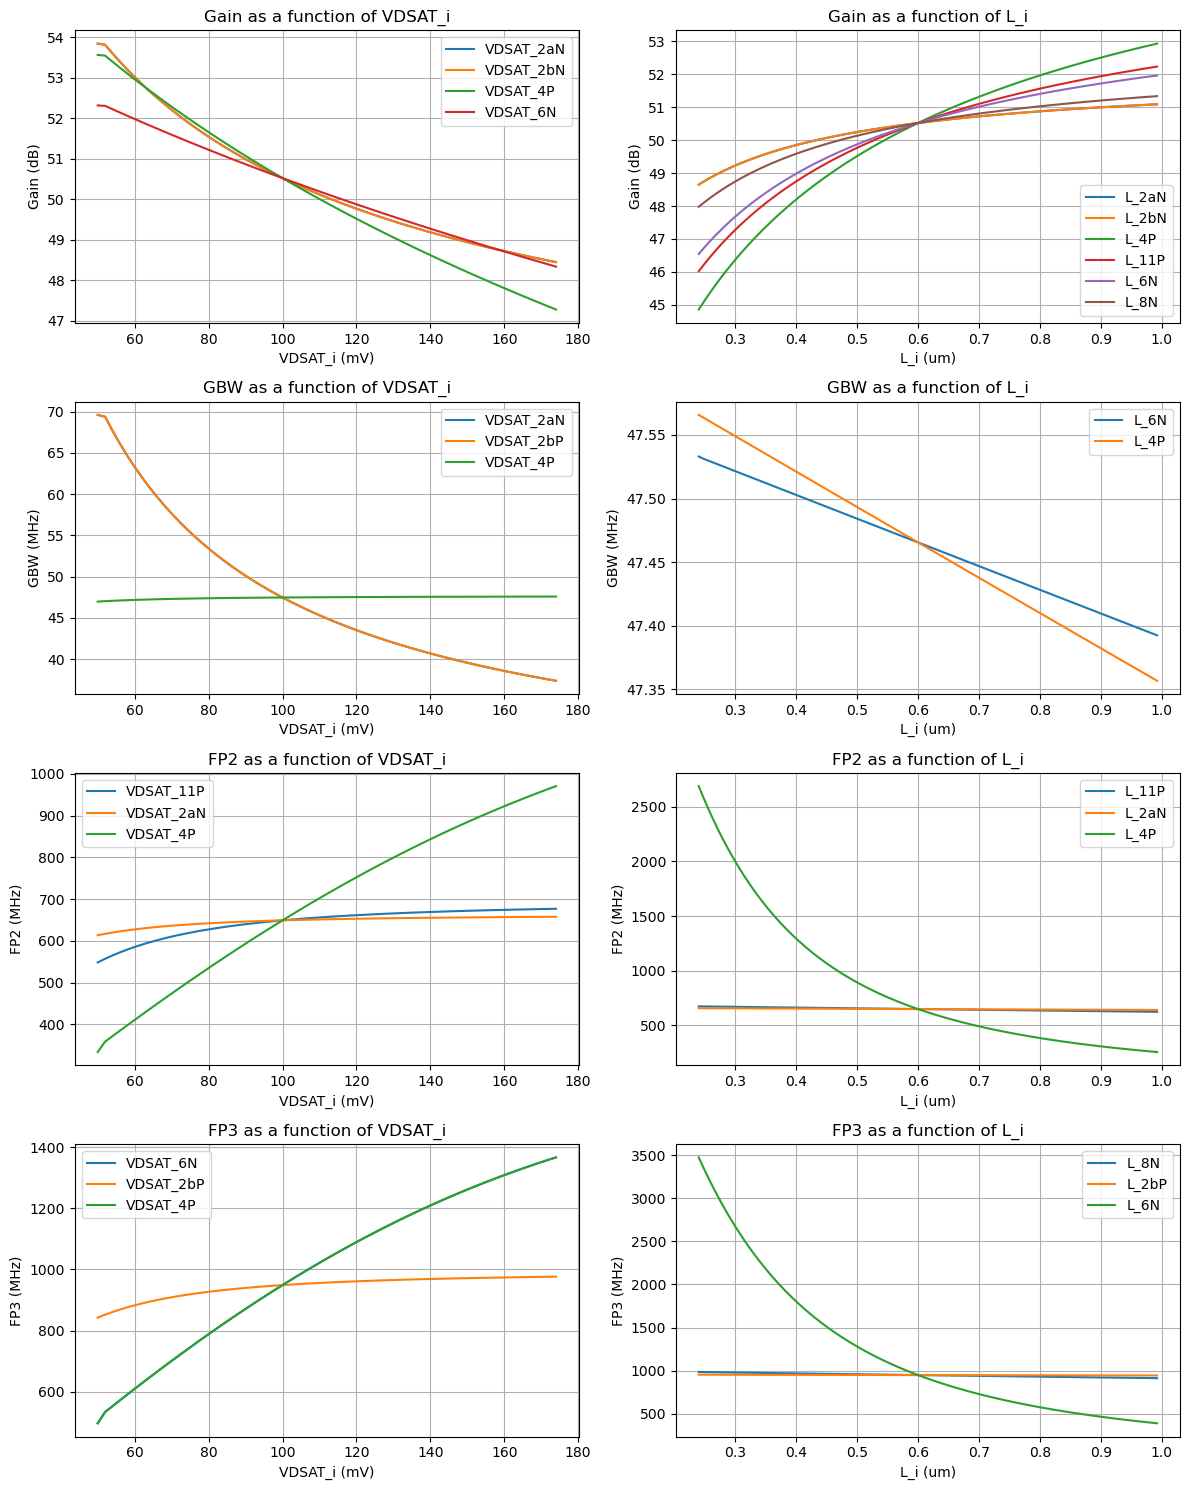

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

################################################## GAIN PLOTS ##################################################
plt.subplot(4, 2, 1); plt.grid()
plt.plot(1e+03 * VSAT_arr, 20*np.log10(gain(IB, VSAT_arr, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_8N)))
plt.plot(1e+03 * VSAT_arr, 20*np.log10(gain(IB, VDSAT_2aN, VSAT_arr, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_8N)))
plt.plot(1e+03 * VSAT_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VSAT_arr, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_8N)))
plt.plot(1e+03 * VSAT_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VSAT_arr, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_8N)))
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('Gain (dB)')
plt.title('Gain as a function of VDSAT_i')
plt.legend(['VDSAT_2aN', 'VDSAT_2bN', 'VDSAT_4P', 'VDSAT_6N'])

plt.subplot(4, 2, 2); plt.grid()
plt.plot(1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_arr,L_2bP,L_4P,L_11P,L_6N,L_8N)))
plt.plot(1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_arr,L_4P,L_11P,L_6N,L_8N)))
plt.plot(1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_arr,L_11P,L_6N,L_8N)))
plt.plot(1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_arr,L_6N,L_8N)))
plt.plot(1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_arr,L_8N)))
plt.plot(1e+06*L_arr, 20*np.log10(gain(IB, VDSAT_2aN, VDSAT_2bP, VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_arr)))
plt.xlabel('L_i (um)')
plt.ylabel('Gain (dB)')
plt.title('Gain as a function of L_i')
plt.legend(['L_2aN','L_2bN','L_4P','L_11P','L_6N','L_8N'], loc="lower right")

################################################## GBW PLOTS ##################################################
plt.subplot(4, 2, 3); plt.grid()
plt.plot(1e+03 * VSAT_arr, 1e-06*GBW(IB, VSAT_arr,VDSAT_2bP, VDSAT_4P, L_6N, L_4P))
plt.plot(1e+03 * VSAT_arr, 1e-06*GBW(IB, VDSAT_2aN,VSAT_arr, VDSAT_4P, L_6N, L_4P))
plt.plot(1e+03 * VSAT_arr, 1e-06*GBW(IB, VDSAT_2aN,VDSAT_2bP, VSAT_arr, L_6N, L_4P))
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('GBW (MHz)')
plt.title('GBW as a function of VDSAT_i')
plt.legend(['VDSAT_2aN','VDSAT_2bP','VDSAT_4P'])

plt.subplot(4, 2, 4); plt.grid()
plt.plot(1e+06 * L_arr, 1e-06*GBW(IB, VDSAT_2aN,VDSAT_2bP, VDSAT_4P, L_arr, L_4P))
plt.plot(1e+06 * L_arr, 1e-06*GBW(IB, VDSAT_2aN,VDSAT_2bP, VDSAT_4P, L_6N, L_arr))
plt.xlabel('L_i (um)')
plt.ylabel('GBW (MHz)')
plt.title('GBW as a function of L_i')
plt.legend(['L_6N','L_4P'], loc="upper right")

################################################## FP2 PLOTS ##################################################
plt.subplot(4, 2, 5); plt.grid()
plt.plot(1e+03 * VSAT_arr, 1e-06*FP2(IB, VSAT_arr,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P))
plt.plot(1e+03 * VSAT_arr, 1e-06*FP2(IB, VDSAT_11P,VSAT_arr ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P))
plt.plot(1e+03 * VSAT_arr, 1e-06*FP2(IB, VDSAT_11P,VDSAT_2aN ,VSAT_arr, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P))
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('FP2 (MHz)')
plt.title('FP2 as a function of VDSAT_i')
plt.legend(['VDSAT_11P','VDSAT_2aN','VDSAT_4P'])

plt.subplot(4, 2, 6); plt.grid()
plt.plot(1e+06 * L_arr, 1e-06*FP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_arr,L_2aN,L_4P))
plt.plot(1e+06 * L_arr, 1e-06*FP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_arr,L_4P))
plt.plot(1e+06 * L_arr, 1e-06*FP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_arr))

plt.xlabel('L_i (um)')
plt.ylabel('FP2 (MHz)')
plt.title('FP2 as a function of L_i')
plt.legend(['L_11P', 'L_2aN', 'L_4P'], loc="upper right")


################################################## FP3 PLOTS ##################################################

plt.subplot(4, 2, 7); plt.grid()
plt.plot(1e+03 * VSAT_arr, 1e-06*FP3(IB, VSAT_arr,VDSAT_2bP ,VDSAT_4P, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N))
plt.plot(1e+03 * VSAT_arr, 1e-06*FP3(IB, VDSAT_6N,VSAT_arr ,VDSAT_4P, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N))
plt.plot(1e+03 * VSAT_arr, 1e-06*FP3(IB, VSAT_arr,VDSAT_2bP ,VSAT_arr, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N))
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('FP3 (MHz)')
plt.title('FP3 as a function of VDSAT_i')
plt.legend(['VDSAT_6N','VDSAT_2bP','VDSAT_4P'])


#MUITO CHATGPT!!!
FP3_vec = np.vectorize(FP3)

plt.subplot(4, 2, 8); plt.grid(True)

plt.plot(1e+06 * L_arr, 1e-06*FP3_vec(IB, VDSAT_6N, VDSAT_2bP, VDSAT_4P, VBS_8N, VBS_2bP, VBS_6N, L_arr, L_2bP, L_6N))
plt.plot(1e+06 * L_arr, 1e-06*FP3_vec(IB, VDSAT_6N, VDSAT_2bP, VDSAT_4P, VBS_8N, VBS_2bP, VBS_6N, L_8N, L_arr, L_6N))
plt.plot(1e+06 * L_arr, 1e-06*FP3_vec(IB, VDSAT_6N, VDSAT_2bP, VDSAT_4P, VBS_8N, VBS_2bP, VBS_6N, L_8N, L_2bP, L_arr))

plt.xlabel('L_i (um)')
plt.ylabel('FP3 (MHz)')
plt.title('FP3 as a function of L_i')
plt.legend(['L_8N', 'L_2bP', 'L_6N'], loc="upper right")






##################################################EXCESSE FACTOR NOISE##################################################

#plt.subplot(4, 2, 8); plt.grid()
#plt.plot(1e+03 * VSAT_arr, NF(IB,VSAT_arr,VDSAT_2bP,VDSAT_8N,VDSAT_11P))
#plt.plot(1e+03 * VSAT_arr, NF(IB,VDSAT_2aN,VSAT_arr,VDSAT_8N,VDSAT_11P))
#plt.plot(1e+03 * VSAT_arr, NF(IB,VDSAT_2aN,VDSAT_2bP,VSAT_arr,VDSAT_11P))
#plt.plot(1e+03 * VSAT_arr, NF(IB,VDSAT_2aN,VDSAT_2bP,VDSAT_8N,VSAT_arr))
#plt.xlabel('VDSAT_i (mV)')
#plt.ylabel('Factor Noise (NF)')
#plt.title('NF as a function of VDSAT_i')
#plt.legend(['VDSAT_2aN','VDSAT_2bP','VDSAT_8N','VDSAT_11P'])


plt.tight_layout()
plt.show()


# <u> Circuit optimization

In [18]:
IB  = 75e-06;   CL  = 5.0e-12;   VDD = 1.2;   BE  = 0.8

# Transistor lengths
L_9aN = 0.8e-06
L_9bP = 0.8e-06
L_2aN = 1e-06
L_2bP = 1e-06
L_11P = 0.8e-06
L_4P  = 0.8e-06
L_6N  = 0.8e-06
L_8N  = 0.8e-06
# Bulk-source voltage drop
VBS_9aN = 0
VBS_9bP = 0
VBS_2aN = 300e-03
VBS_2bP = 300e-03
VBS_11P = 0
VBS_4P  = 300e-03
VBS_6N  = 300e-03
VBS_8N  = 0
# Saturation voltage
VDSAT_9aN = 120e-03
VDSAT_9bP = 120e-03
VDSAT_2aN = 55e-03
VDSAT_2bP = 55e-03
VDSAT_11P = 150e-03
VDSAT_4P  = 97e-03
VDSAT_6N  = 100e-03
VDSAT_8N  = 110e-03

print("Performance parameters:")

print("-> Gain = "+engFormat_Gain(20*np.log10(gain(IB, VDSAT_2aN,  VDSAT_2bP,  VDSAT_4P, VDSAT_11P, VDSAT_6N, VDSAT_8N, L_2aN,L_2bP,L_4P,L_11P,L_6N,L_8N))))
print("-> GBW  = "+engFormat_GBW(GBW(IB, VDSAT_2aN,VDSAT_2bP, VDSAT_4P, L_2aN, L_4P)))
print("-> OS   = "+engFormat_OS(OS(VDD, VDSAT_11P,VDSAT_4P,VDSAT_6N,VDSAT_8N)))
print("-> PD   = "+engFormat_PD(PD(VDD, IB)))
print("-> FoM  = "+engFormat_FoM(FoM(GBW, CL, PD)))
print("-> NF  = "+ engFormat_NF(NF(IB,VDSAT_2aN,VDSAT_2bP,VDSAT_8N,VDSAT_11P)))
print("-> FP2  = "+engFormat_FP2(FP2(IB, VDSAT_11P,VDSAT_2aN ,VDSAT_4P, VBS_11P, VBS_2aN,VBS_4P ,L_11P,L_2aN,L_4P)))
print("-> FP3  = "+engFormat_FP3(FP3(IB, VDSAT_6N,VDSAT_2bP ,VDSAT_4P, VBS_8N, VBS_2bP,VBS_6N ,L_8N,L_2bP,L_6N)))

print("\nDesign parameters:")

W_2aN  = W_N(0.5*IB, VDSAT_2aN, L_2aN);        print("-> W_2aN  = "+engFormat_Width(W_2aN))
W_2bP  = W_N(0.5*IB, VDSAT_2bP, L_2bP);        print("-> W_2bP  = "+engFormat_Width(W_2bP))
W_11P  = W_N(IB, VDSAT_11P, L_11P);            print("-> W_11P  = "+engFormat_Width(W_11P))
W_4N  = W_N(0.5*IB, VDSAT_4P, L_4P);           print("-> W_4N  = "+engFormat_Width(W_4N))
W_6N  = W_N(0.5*IB, VDSAT_6N, L_6N);           print("-> W_6N  = "+engFormat_Width(W_6N))
W_8N  = W_N(IB, VDSAT_8N, L_8N);               print("-> W_8N  = "+engFormat_Width(W_8N))

print("\nCurrent parameters:")
W_9aN  = W_N(IB, VDSAT_9aN, L_9aN);            print("-> W_9aN  = "+engFormat_Width(W_9aN))
W_9bP  = W_P(IB, VDSAT_9bP, L_9bP);            print("-> W_9bP  = "+engFormat_Width(W_9bP))

#Bias
print("\nBias parameters:")
L_B3N = L_9aN;                                  print("-> L_B3N = "+engFormat_Width(L_B3N))
W_B3N = W_N(0.1 * IB, VDSAT_9aN, L_B3N);        print("-> W_B3N = "+engFormat_Width(W_B3N))

L_B1P = L_9bP;                                  print("-> L_B1P = "+engFormat_Width(L_B1P))
W_B1P = W_P(0.1 * IB, VDSAT_9bP, L_B1P);        print("-> W_B1P = "+engFormat_Width(W_B1P))

L_B2P = L_9bP;                                  print("-> L_B2P = "+engFormat_Width(L_B2P))
W_B2P = W_P(0.1 * IB, VDSAT_9bP, L_B2P);        print("-> W_B2P = "+engFormat_Width(W_B2P))

L_B4P = L_9bP;                                  print("-> L_B4P = "+engFormat_Width(L_B4P))
W_B4P = W_P(0.1 * IB, VDSAT_9bP, L_B4P);        print("-> W_B4P = "+engFormat_Width(W_B4P))

L_B5N = L_6N;                                  print("-> L_B5N = "+engFormat_Width(L_B5N))
W_B5N = W_N(0.1 * IB, VDSAT_6N, L_B5N);        print("-> W_B5N = "+engFormat_Width(W_B5N))

L_B6P = L_4P;                                  print("-> L_B6P = "+engFormat_Width(L_B6P))
W_B6P = W_P(0.1 * IB, VDSAT_4P, L_B6P);        print("-> W_B6P = "+engFormat_Width(W_B6P))

L_B7N = L_9aN;                                  print("-> L_B7N = "+engFormat_Width(L_B7N))
W_B7N = W_N(0.1 * IB, VDSAT_9aN, L_B7N);        print("-> W_B7N = "+engFormat_Width(W_B7N))

Performance parameters:
-> Gain = 62.365 dB
-> GBW  = 69.007 MHz
-> OS   = 663.000 mV
-> PD   = 306.000 µW
-> FoM  = 1.128 ks/V^−2
-> NF  = 1.87
-> FP2  = 348.900 MHz
-> FP3  = 500.520 MHz

Design parameters:
-> W_2aN  = 90.30 µm
-> W_2bP  = 90.30 µm
-> W_11P  = 21.77 µm
-> W_4N  = 26.03 µm
-> W_6N  = 24.50 µm
-> W_8N  = 40.49 µm

Current parameters:
-> W_9aN  = 34.02 µm
-> W_9bP  = 59.16 µm

Bias parameters:
-> L_B3N = 800.00 nm
-> W_B3N = 3.38 µm
-> L_B1P = 800.00 nm
-> W_B1P = 6.04 µm
-> L_B2P = 800.00 nm
-> W_B2P = 6.04 µm
-> L_B4P = 800.00 nm
-> W_B4P = 6.04 µm
-> L_B5N = 800.00 nm
-> W_B5N = 4.86 µm
-> L_B6P = 800.00 nm
-> W_B6P = 9.24 µm
-> L_B7N = 800.00 nm
-> W_B7N = 3.38 µm
